In [9]:
# Assumes csv import code is above
language_means_stars = data_all.groupby(
    "Language"
)["Stars"].sum().reset_index().sort_values(by="Stars", ascending=True)

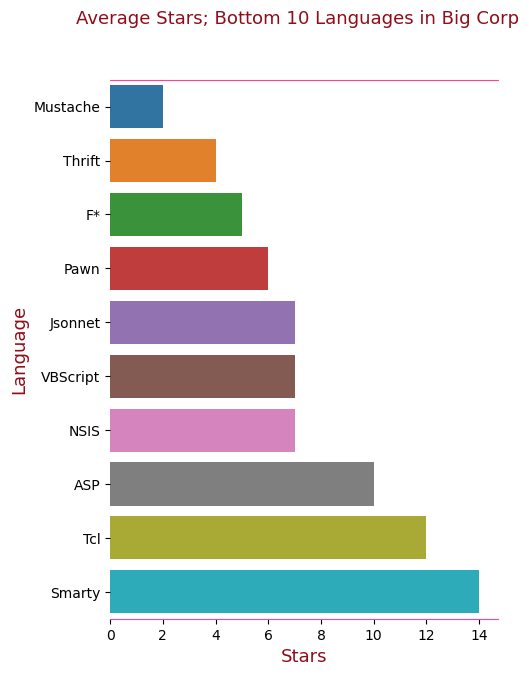

In [11]:
# Copy frame and select attribute to explore
language_data = language_means_stars
attribute = "Stars" # Attribute
row_amount = 10     # Number of rows to plot

# set figure size
fig, ax = plt.subplots(figsize=(5, 7))

# Select color for edge
plt.rcParams['axes.edgecolor'] = '#fc4293'

# Remove edge on right and left sides of graph
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data from language head
# Select head() for top amount to showcase
# Data is already sorted by stars so most starred will be at the top
# The more rows to showcase the height parameter in figsize should be adjusted as well
# i.e 10 for head(50)
sns.barplot(data=language_data.head(row_amount), x=attribute, y='Language');

# X/Y axis titles and style
ax.set_xlabel(f'{attribute}', fontsize=13, color='#8f0d18')
ax.set_ylabel('Language', fontsize=13, color='#8f0d18')
fig.suptitle(f'Average {attribute}; Bottom {row_amount} Languages in Big Corp', fontsize=13, color='#8f0d18');